# Cross-validation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
sklearn.set_config(print_changed_only=True)

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=5)

array([0.97777778, 0.98148148, 0.9739777 , 0.98513011, 0.99628253])

In [5]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold

In [6]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42))

array([0.99259259, 0.98518519, 0.97777778, 0.97777778, 0.97777778,
       0.98518519, 0.97777778, 0.98507463, 0.99253731, 0.99253731])

In [7]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train,
                cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42))

array([0.99259259, 0.97777778, 0.99259259, 0.98518519, 0.99259259,
       0.97777778, 0.98518519, 0.97761194, 0.98507463, 0.98507463,
       0.99259259, 0.98518519, 0.99259259, 0.98518519, 0.98518519,
       1.        , 1.        , 0.98507463, 0.94029851, 0.97014925,
       0.97037037, 0.96296296, 0.97777778, 0.99259259, 0.99259259,
       0.99259259, 0.98518519, 0.97761194, 0.99253731, 0.99253731,
       0.97037037, 0.99259259, 0.97777778, 1.        , 0.97777778,
       0.99259259, 0.98518519, 0.98507463, 0.99253731, 0.97761194,
       0.97777778, 1.        , 0.98518519, 0.98518519, 0.97777778,
       0.97777778, 0.98518519, 0.99253731, 0.97761194, 1.        ,
       0.97777778, 0.97777778, 0.97037037, 0.97037037, 0.97037037,
       1.        , 0.97777778, 0.99253731, 0.99253731, 0.99253731,
       1.        , 0.99259259, 0.97037037, 0.97037037, 0.98518519,
       0.99259259, 0.97777778, 0.98507463, 0.99253731, 0.99253731,
       0.98518519, 0.97777778, 0.98518519, 0.99259259, 0.98518

Grid Searches
=================

Grid-Search with build-in cross validation

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Define parameter grid:

In [19]:
import numpy as np
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])}


In [20]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3,cv=rs)

A GridSearchCV object behaves just like a normal classifier.

In [21]:
grid_search.fit(X_train, y_train)

Fitting 50 folds for each of 30 candidates, totalling 1500 fits
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.001, gamma=1e-05, score=0.207, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................ C=0.001, gamma=1e-05, score=0.104, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ................ C=0.001, gamma=1e-05, score=0.208, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.104, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.212, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.211, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.104, total=   0.3s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.204, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.104, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  4.3min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=SVC(),
             param_grid={'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
                         'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])},
             verbose=3)

In [22]:
grid_search.predict(X_test)

array([7, 1, 7, 5, 8, 2, 4, 6, 6, 6, 8, 8, 1, 1, 0, 2, 0, 6, 0, 4, 2, 6,
       0, 8, 2, 1, 5, 1, 4, 0, 1, 1, 8, 8, 8, 0, 7, 9, 5, 9, 4, 7, 0, 6,
       4, 8, 9, 8, 8, 2, 2, 9, 5, 3, 4, 3, 7, 1, 7, 7, 4, 5, 3, 3, 3, 3,
       2, 0, 8, 7, 3, 9, 5, 3, 0, 7, 1, 8, 6, 8, 2, 7, 0, 6, 9, 6, 8, 0,
       3, 2, 0, 0, 5, 4, 2, 8, 3, 7, 3, 9, 6, 7, 2, 2, 0, 2, 9, 6, 3, 2,
       3, 7, 0, 2, 1, 8, 6, 1, 8, 2, 5, 4, 4, 3, 2, 8, 2, 7, 4, 7, 0, 8,
       3, 2, 7, 8, 3, 5, 2, 4, 8, 4, 4, 8, 1, 9, 2, 4, 8, 7, 2, 8, 5, 4,
       4, 9, 1, 8, 3, 6, 4, 8, 5, 6, 7, 4, 7, 2, 0, 3, 6, 7, 8, 5, 7, 5,
       1, 4, 8, 1, 0, 8, 2, 3, 2, 9, 1, 9, 5, 5, 3, 0, 8, 4, 0, 9, 9, 8,
       6, 2, 6, 1, 2, 4, 1, 3, 2, 7, 0, 3, 0, 8, 1, 8, 8, 7, 5, 6, 1, 3,
       6, 9, 2, 6, 4, 6, 2, 5, 2, 2, 9, 3, 7, 6, 9, 7, 9, 6, 5, 7, 1, 3,
       1, 5, 9, 5, 7, 9, 1, 6, 3, 4, 0, 9, 8, 7, 6, 7, 7, 4, 8, 0, 8, 2,
       2, 1, 0, 2, 3, 0, 2, 5, 6, 5, 5, 0, 5, 5, 7, 1, 6, 5, 7, 5, 5, 1,
       7, 1, 2, 6, 4, 9, 1, 6, 8, 4, 4, 1, 9, 7, 2,

In [23]:
grid_search.score(X_test, y_test)

0.9822222222222222

In [24]:
grid_search.best_params_

{'C': 10.0, 'gamma': 0.001}

In [25]:
grid_search.best_score_

0.9908674101610905

In [26]:
grid_search.best_estimator_

SVC(C=10.0, gamma=0.001)

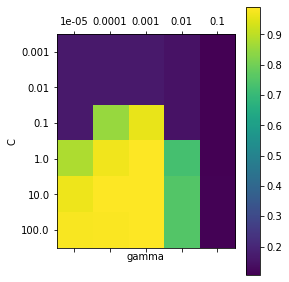

In [27]:
# We extract just the scores

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

# Exercises
Use GridSearchCV to adjust n_neighbors of KNeighborsClassifier.

best parameters: {'n_neighbors': 1}
Training set accuracy: 1.0
Test set accuracy: 0.9822222222222222


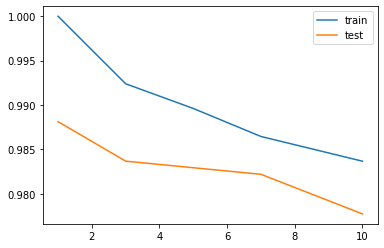

In [28]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [1, 3, 5, 7, 10]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,
                    return_train_score=True)
grid.fit(X_train, y_train)

print("best parameters: %s" % grid.best_params_)
print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))
results = grid.cv_results_
plt.plot(param_grid['n_neighbors'], results['mean_train_score'], label="train")
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], label="test")
plt.legend()

